In [112]:
import sqlite3 as sql
import pandas as pd
import seaborn as sb
import autoreload
import missingno as msno
import matplotlib.pyplot as plt
import os

sb.set(font_scale=1.2)
sb.set_style("darkgrid")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [113]:
conn = sql.connect("D:\Open Classroom\Data Files\database sqlite\database.sqlite")

db_tables = ["artists", "content", "genres", "label", "reviews", "years"]

for i in db_tables:
    print(i)

df = pd.read_sql("SELECT * FROM reviews", conn)
df.head()

artists
content
genres
label
reviews
years


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [114]:
#pitchfork = [file for file in os.listdir("..\\Open Classroom\Data Files\Pitch Fork Reviews")]

#all_files = pd.DataFrame()

#for i in pitchfork:
    #df = pd.read_csv("D:\Open Classroom\Data Files/Pitch Fork Reviews/" + i, engine = "python")
   # all_files = pd.concat([df, all_files])

#all_files.to_csv("D:\Open Classroom\Data Files/Pitch Fork Reviews/all_files.csv")

In [115]:
#df = pd.read_csv("D:\Open Classroom\Data Files/Pitch Fork Reviews/all_files.csv", low_memory = False)
#df.head()

#### Pitchfork is an American online music publication launched in 1995 by Ryan Schreiber. It was first based in suburban Minneapolis, then Chicago, later moved to Greenpoint, is currently in One World Trade Center, and is owned by Condé Nast.

In [116]:
df = pd.read_csv("D:\Open Classroom\Data Files\Pitch Fork Reviews\Pitch_Fork_Review_Reviews.csv")
df.drop(columns = ["Unnamed: 0", "url"], inplace = True)
df.head()

,reviewid,title,artist,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18391 non-null  object 
 2   artist          18391 non-null  object 
 3   score           18393 non-null  float64
 4   best_new_music  18393 non-null  int64  
 5   author          18393 non-null  object 
 6   author_type     14487 non-null  object 
 7   pub_date        18393 non-null  object 
 8   pub_weekday     18393 non-null  int64  
 9   pub_day         18393 non-null  int64  
 10  pub_month       18393 non-null  int64  
 11  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.7+ MB


In [118]:
round(df.describe())

,reviewid,score,best_new_music,pub_weekday,pub_day,pub_month,pub_year
count,18393.0,18393.0,18393.0,18393.0,18393.0,18393.0,18393.0
mean,12345.0,7.0,0.0,2.0,16.0,6.0,2009.0
std,6319.0,1.0,0.0,2.0,9.0,3.0,5.0
min,1.0,0.0,0.0,0.0,1.0,1.0,1999.0
25%,7445.0,6.0,0.0,1.0,8.0,3.0,2005.0
50%,12804.0,7.0,0.0,2.0,15.0,6.0,2009.0
75%,17658.0,8.0,0.0,3.0,23.0,9.0,2013.0
max,22745.0,10.0,1.0,6.0,31.0,12.0,2017.0


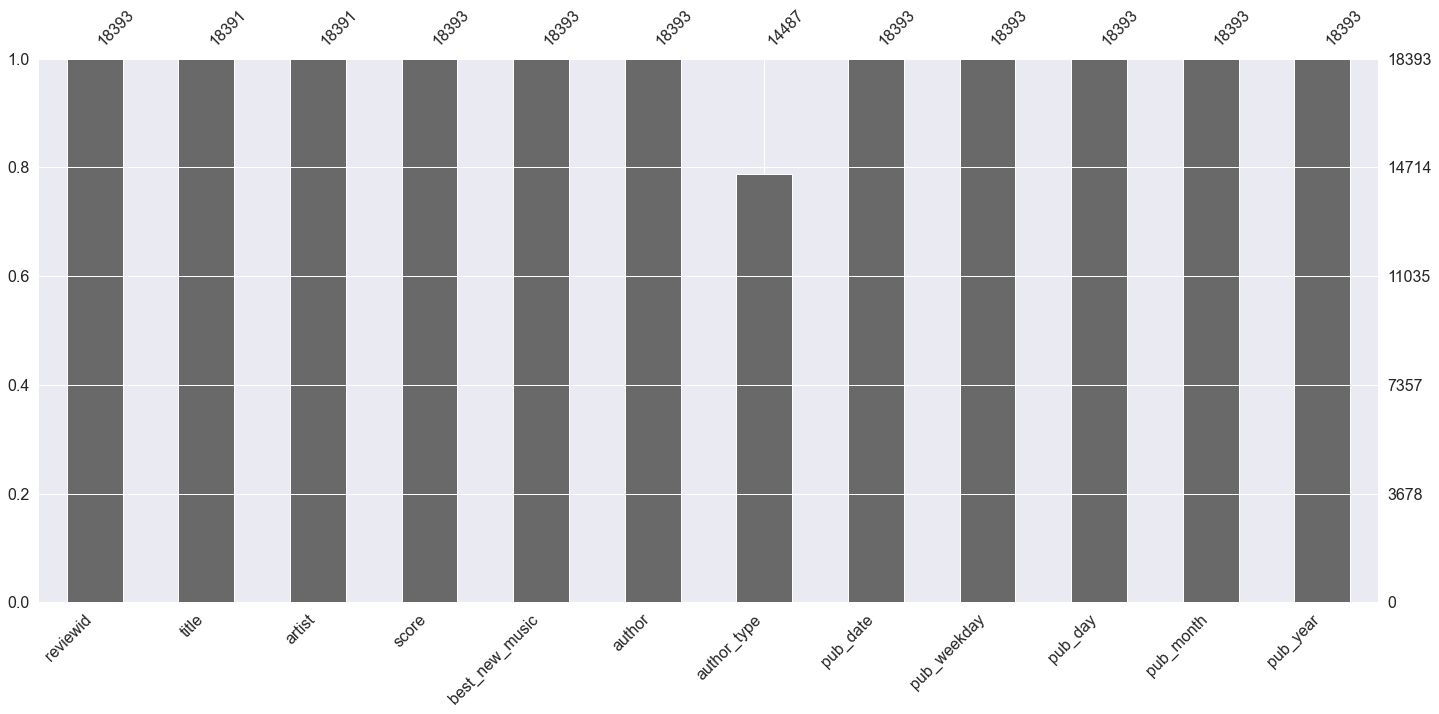

In [119]:
msno.bar(df)

Text(0.5, 1.0, 'Correlation Relationship Between Columns')

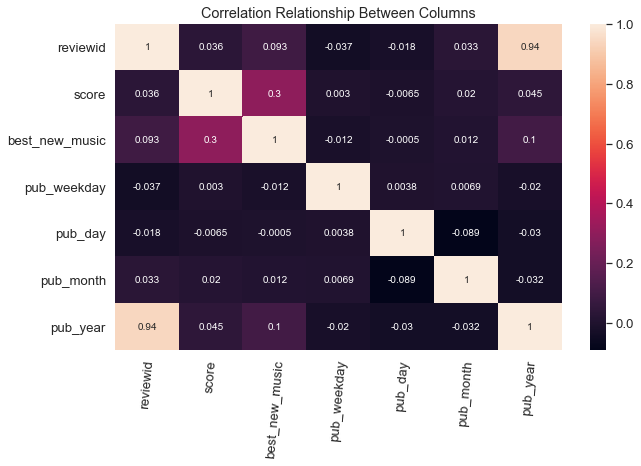

In [120]:
plt.figure(figsize = (10, 6))
sb.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 85)
plt.title("Correlation Relationship Between Columns")


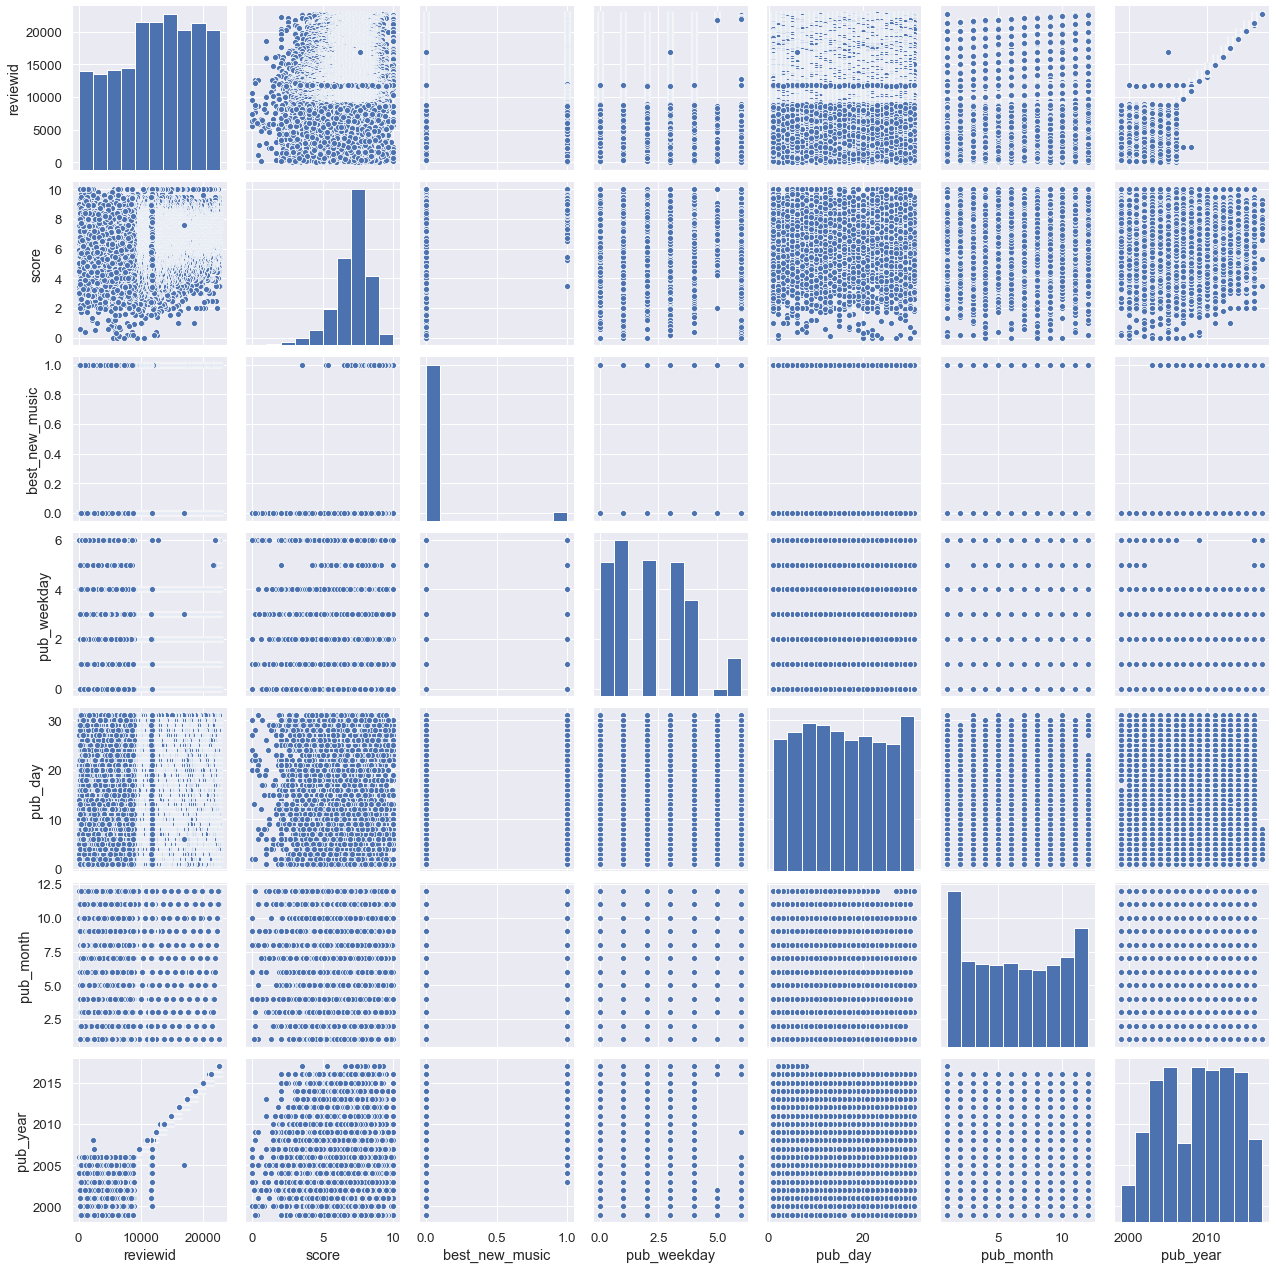

In [121]:
sb.pairplot(df)

In [122]:
df.head()

,reviewid,title,artist,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [123]:
#Did you know
#The longest word you can type with your left hand is sweeter dresses

In [124]:
print("Max", df["pub_date"].max(), "\nMin",df["pub_date"].min())

Max 2017-01-08 
Min 1999-01-05


In [125]:
artist = df.groupby("artist")
get_artist = artist.get_group("massive attack")
artist_music = artist["author"].value_counts().sort_values(ascending = False).rename("music count").to_frame().head(10)

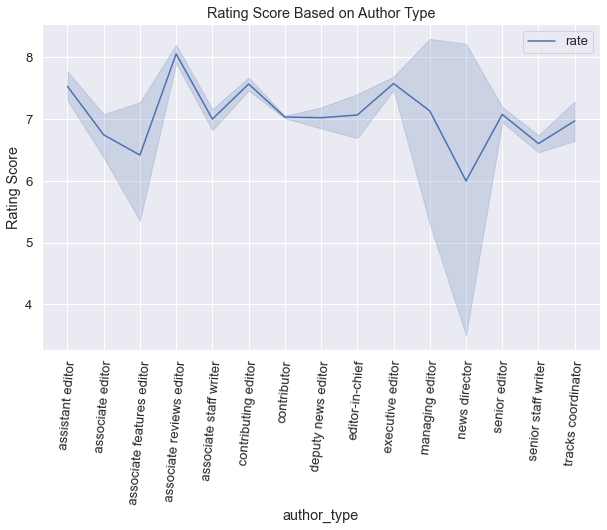

In [126]:
plt.figure(figsize = (10, 6))
sb.lineplot(x = df["author_type"], y = df["score"], data = df, label = "rate")
plt.xticks(rotation = 85)
plt.ylabel("Rating Score")
plt.title("Rating Score Based on Author Type")
plt.legend(loc = "best")

In [127]:
author = df.groupby("author_type").agg("sum")
author["score"].sort_values(ascending = False)
#sb.lineplot(x = df["author_type"], y = df["artist"].value_counts().values, data = df)

author_type
contributor                  87373.3
executive editor              3598.8
senior editor                 3438.7
senior staff writer           2899.2
contributing editor           1589.4
associate staff writer         735.1
deputy news editor             702.3
editor-in-chief                600.6
tracks coordinator             362.5
associate reviews editor       330.3
associate editor               249.6
assistant editor               120.5
associate features editor       70.6
news director                   30.0
managing editor                 21.4
Name: score, dtype: float64